Pruebas para leer O2 de BodySim


In [20]:
import numpy as np
import netCDF4
from matplotlib import pyplot as plt
from scipy.interpolate import griddata



filename = './data/Washington-1d-2008-09-12_compr.nc'
varname = 'WQ_O'
#varname = 'WQ_N'

#Inicialización
nc = netCDF4.Dataset(filename)

#   Not all variables have the same dimensions, see file info for details
lat = np.array(nc['lat'])
lon = np.array(nc['lon'])
time= np.array(nc['time'])
layers= np.array(nc['layers'])
var= np.array(nc[varname])

# Remove fill values
lat[lat == nc['lat'].FillValue] = np.nan
lon[lon == nc['lon'].FillValue] = np.nan
var[var== nc[varname].FillValue]= np.nan


In [21]:
#My election
myt=50
mylyr=10
mylat=47.65
mylon=-122.26
vartl=var[myt,:,:,mylyr]

latflat = lat[np.logical_not(np.isnan(lat))]
lonflat = lon[np.logical_not(np.isnan(lat))]
varflat = vartl[np.logical_not(np.isnan(lat))]

z = griddata((lonflat, latflat), varflat,(mylon,mylat), method='linear')
print(z)



7.994086585888418


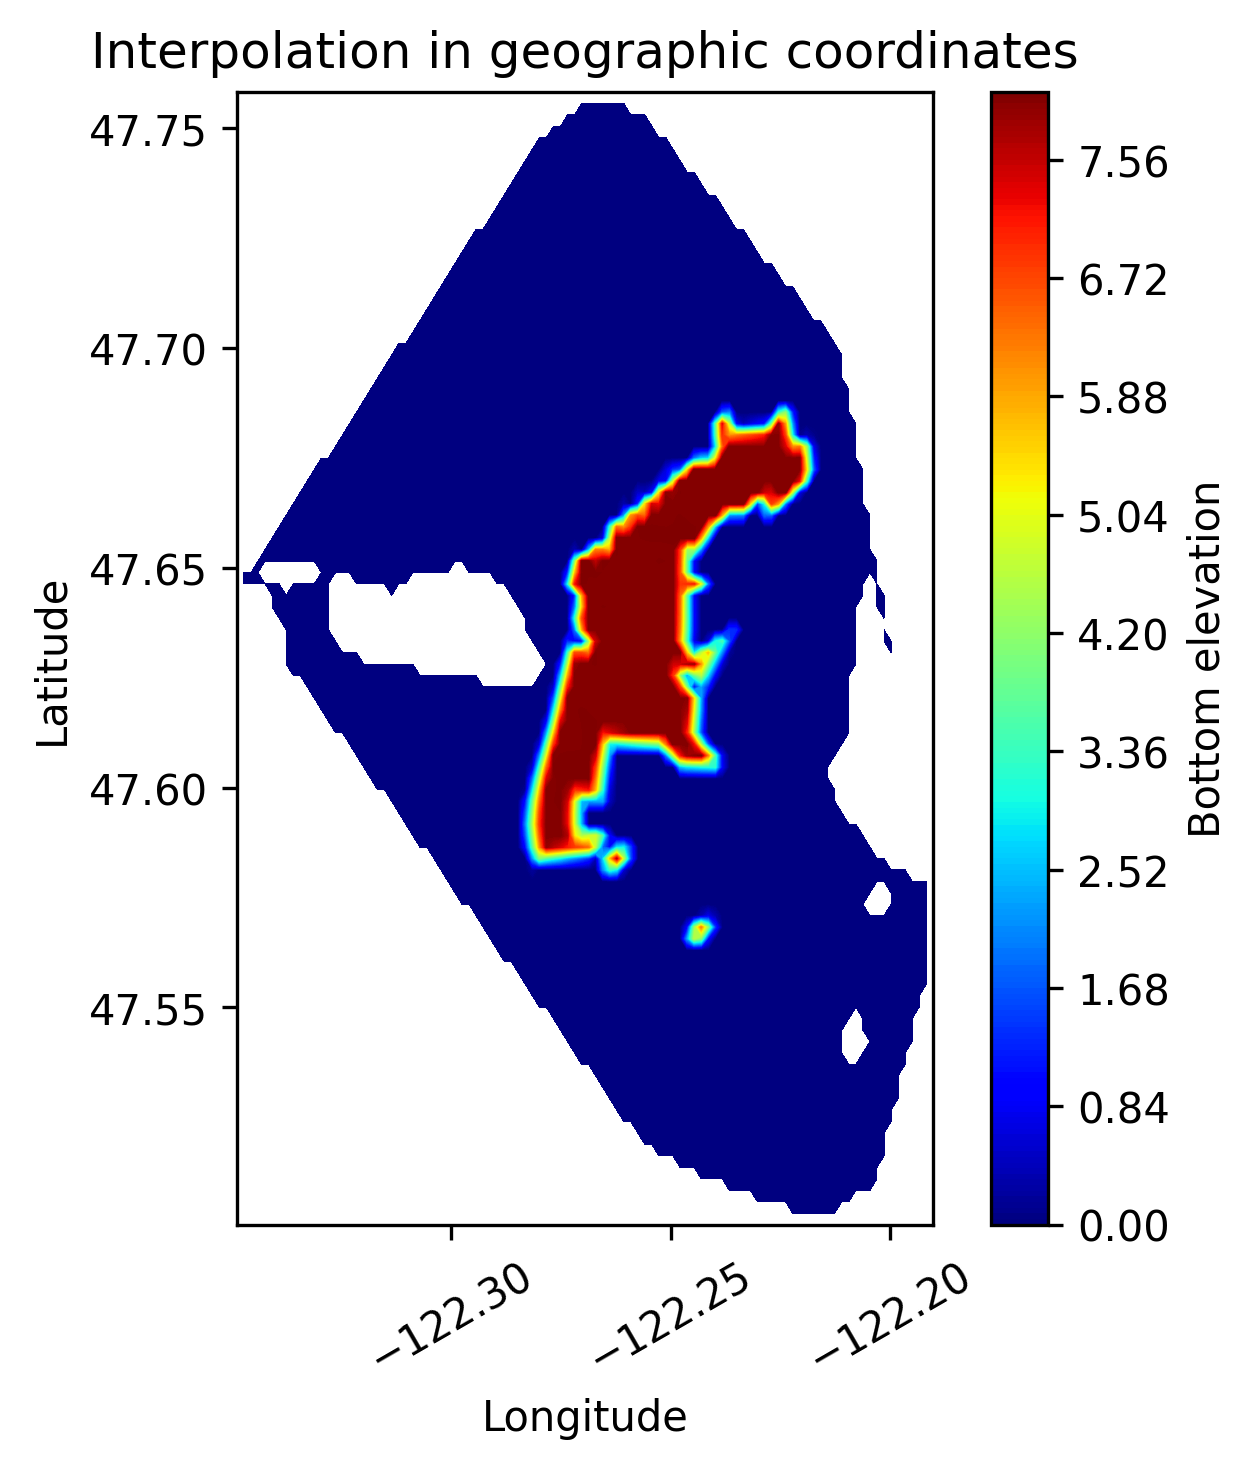

In [22]:
# Interpolate given data to grid
#   Other interpolations might be better for a specific application
x = np.linspace(np.nanmin(lon), np.nanmax(lon), 100)
y = np.linspace(np.nanmin(lat), np.nanmax(lat), 100)
z = griddata((lonflat, latflat), varflat,(x[None,:], y[:,None]), method='linear')
#z = griddata((lonflat, latflat), varflat, (x[None,:], y[:,None]), method='linear')
# Plot interpolation
#   Example interpolation to approximate in-between points
#   Values outside of the water would be wrong
plt.figure(figsize=(5, 5), dpi=300)
plt.contourf(x,y,z,255,cmap=plt.cm.jet)
cbar = plt.colorbar()
plt.xlabel('Longitude'), plt.xticks(rotation=30)
plt.ylabel('Latitude')
cbar.set_label('Bottom elevation')
plt.title('Interpolation in geographic coordinates')
plt.gca().set_aspect('equal')

In [23]:
nc.close()